<a href="https://colab.research.google.com/github/Badr2211/1000_ML_Engineers_Initiative/blob/main/Computer_vision/Egyptions_ID_recognation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ara

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-ara tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 19 not upgraded.
Need to get 5,461 kB of archives.
After this operation, 17.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ara all 1:4.00~git30-7274cfa-1.1 [645 kB]
Fetched 5,461 kB in 3s (2,049 kB/s)
debconf: unable to ini

In [ ]:

!pip install cmake
!pip install dlib

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import imutils
import dlib
from skimage.filters import threshold_local

#code

first i should crop the id card from the pic
so i use dlib lib to recognize the face and based on it i can determine x , y of id card rectangle

there are many way to crop id card like use ``` findcountour ```

In [ ]:

from google.colab import files

# Upload an image from your local computer
uploaded = files.upload()

# Get the file name and contents
for filename, content in uploaded.items():
    print(f'Uploaded file: {filename}, {len(content)} bytes')

Saving 56.jpg to 56.jpg
Uploaded file: 56.jpg, 40732 bytes


In [ ]:
filename

'56.jpg'

In [ ]:
path='/content/'+filename

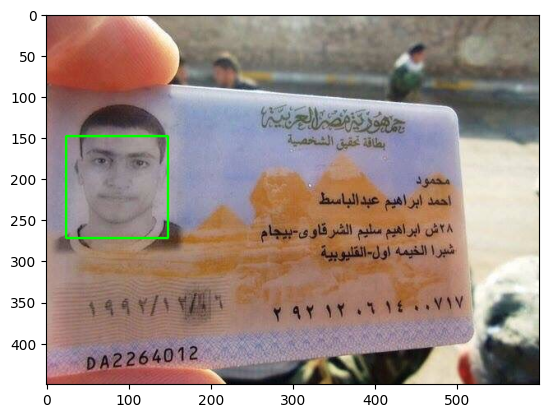

148


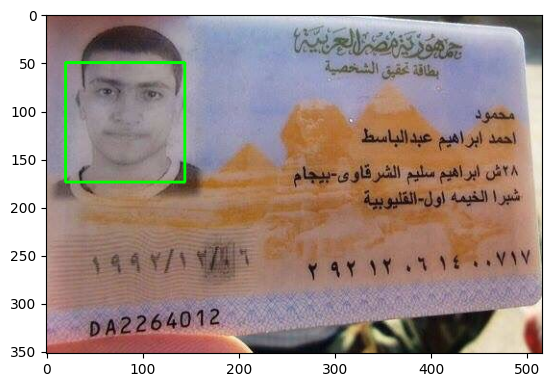

In [ ]:
#path = '/content/data_set/45.jpg'
#path = '/content/data_set/56.jpg'

#path = '/content/data_set/10.jpg'


img = cv2.imread(path)


bfilter = cv2.bilateralFilter(img, 11, 17, 17) #Noise reduction

# Load the pre-trained face detection model
detector = dlib.get_frontal_face_detector()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Loop over each detected face
for face in faces:
    # Extract the coordinates of the face
    x1_f, y1_f, x2_f, y2_f = face.left(), face.top(), face.right(), face.bottom()

    # Draw a rectangle around the face
    cv2.rectangle(img, (x1_f, y1_f), (x2_f, y2_f), (0, 255, 0), 2)

#cv2.rectangle(img, (x1-50, y1_f-30), (x1+(x2_f-x1_f)*4, y2_f+(1*(y2_f-y1_f))), (0, 0,255 ), 2)
plt.imshow( cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
x1,y1 = x1_f, y1_f  # Replace with your actual coordinates
x2, y2 = x1 + (x2_f-x1_f)*4, y2_f+(2*(y2_f-y1_f))  # Calculate the bottom-right corner

# Crop the region defined by the rectangle
if y1 > 100 or x1 >50:
   print(y1)
   Id_card = img[y1-50:y2, x1-20:x2]
else :
   Id_card  = img
#ID-card = cropped_img = img[y:y+height, x:x+width]

plt.imshow( cv2.cvtColor(Id_card , cv2.COLOR_BGR2RGB))
plt.show()

image preprocessing for id card

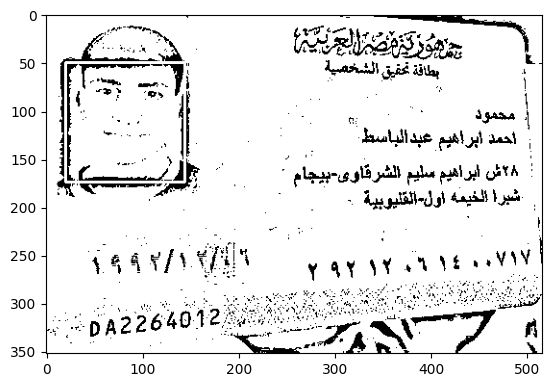

In [ ]:


V = cv2.split(cv2.cvtColor(Id_card, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# Apply the threshold operation
thresh = (V > T).astype("uint8") * 255


plt.imshow( cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.show()

the qulification of pic is very important

In [ ]:

text1 = pytesseract.image_to_data(thresh,output_type='data.frame')
text2 = pytesseract.image_to_string(thresh, lang="ara")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()

 

محمود . 9
احمد أبراهيم عبد الباسبط

ا 8؟ش ابراهيم سليم الشرقاوى-بيجام '
شبرا الخيمه اول-القليوبية -
‎١‏ 3

0

 

ا 0

     



In [ ]:
lines = text2.split('\n')

# Create a list to store structured data
structured_data = []

# Iterate through the lines to create structured data
for line in lines:
    line = line.strip()  # Remove leading and trailing whitespace
    if line:  # Skip empty lines
        structured_data.append([line])

# Convert the structured data into a pandas DataFrame
df = pd.DataFrame(structured_data, columns=['Text'])
df=df.iloc[:4,:]
df.index=['FirstName','LastName','Streat','Area']
df

,Text
FirstName,محمود . 9
LastName,احمد أبراهيم عبد الباسبط
Streat,ا 8؟ش ابراهيم سليم الشرقاوى-بيجام '
Area,شبرا الخيمه اول-القليوبية -
